In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

seed = pd.read_csv('seeds.csv')

seed.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


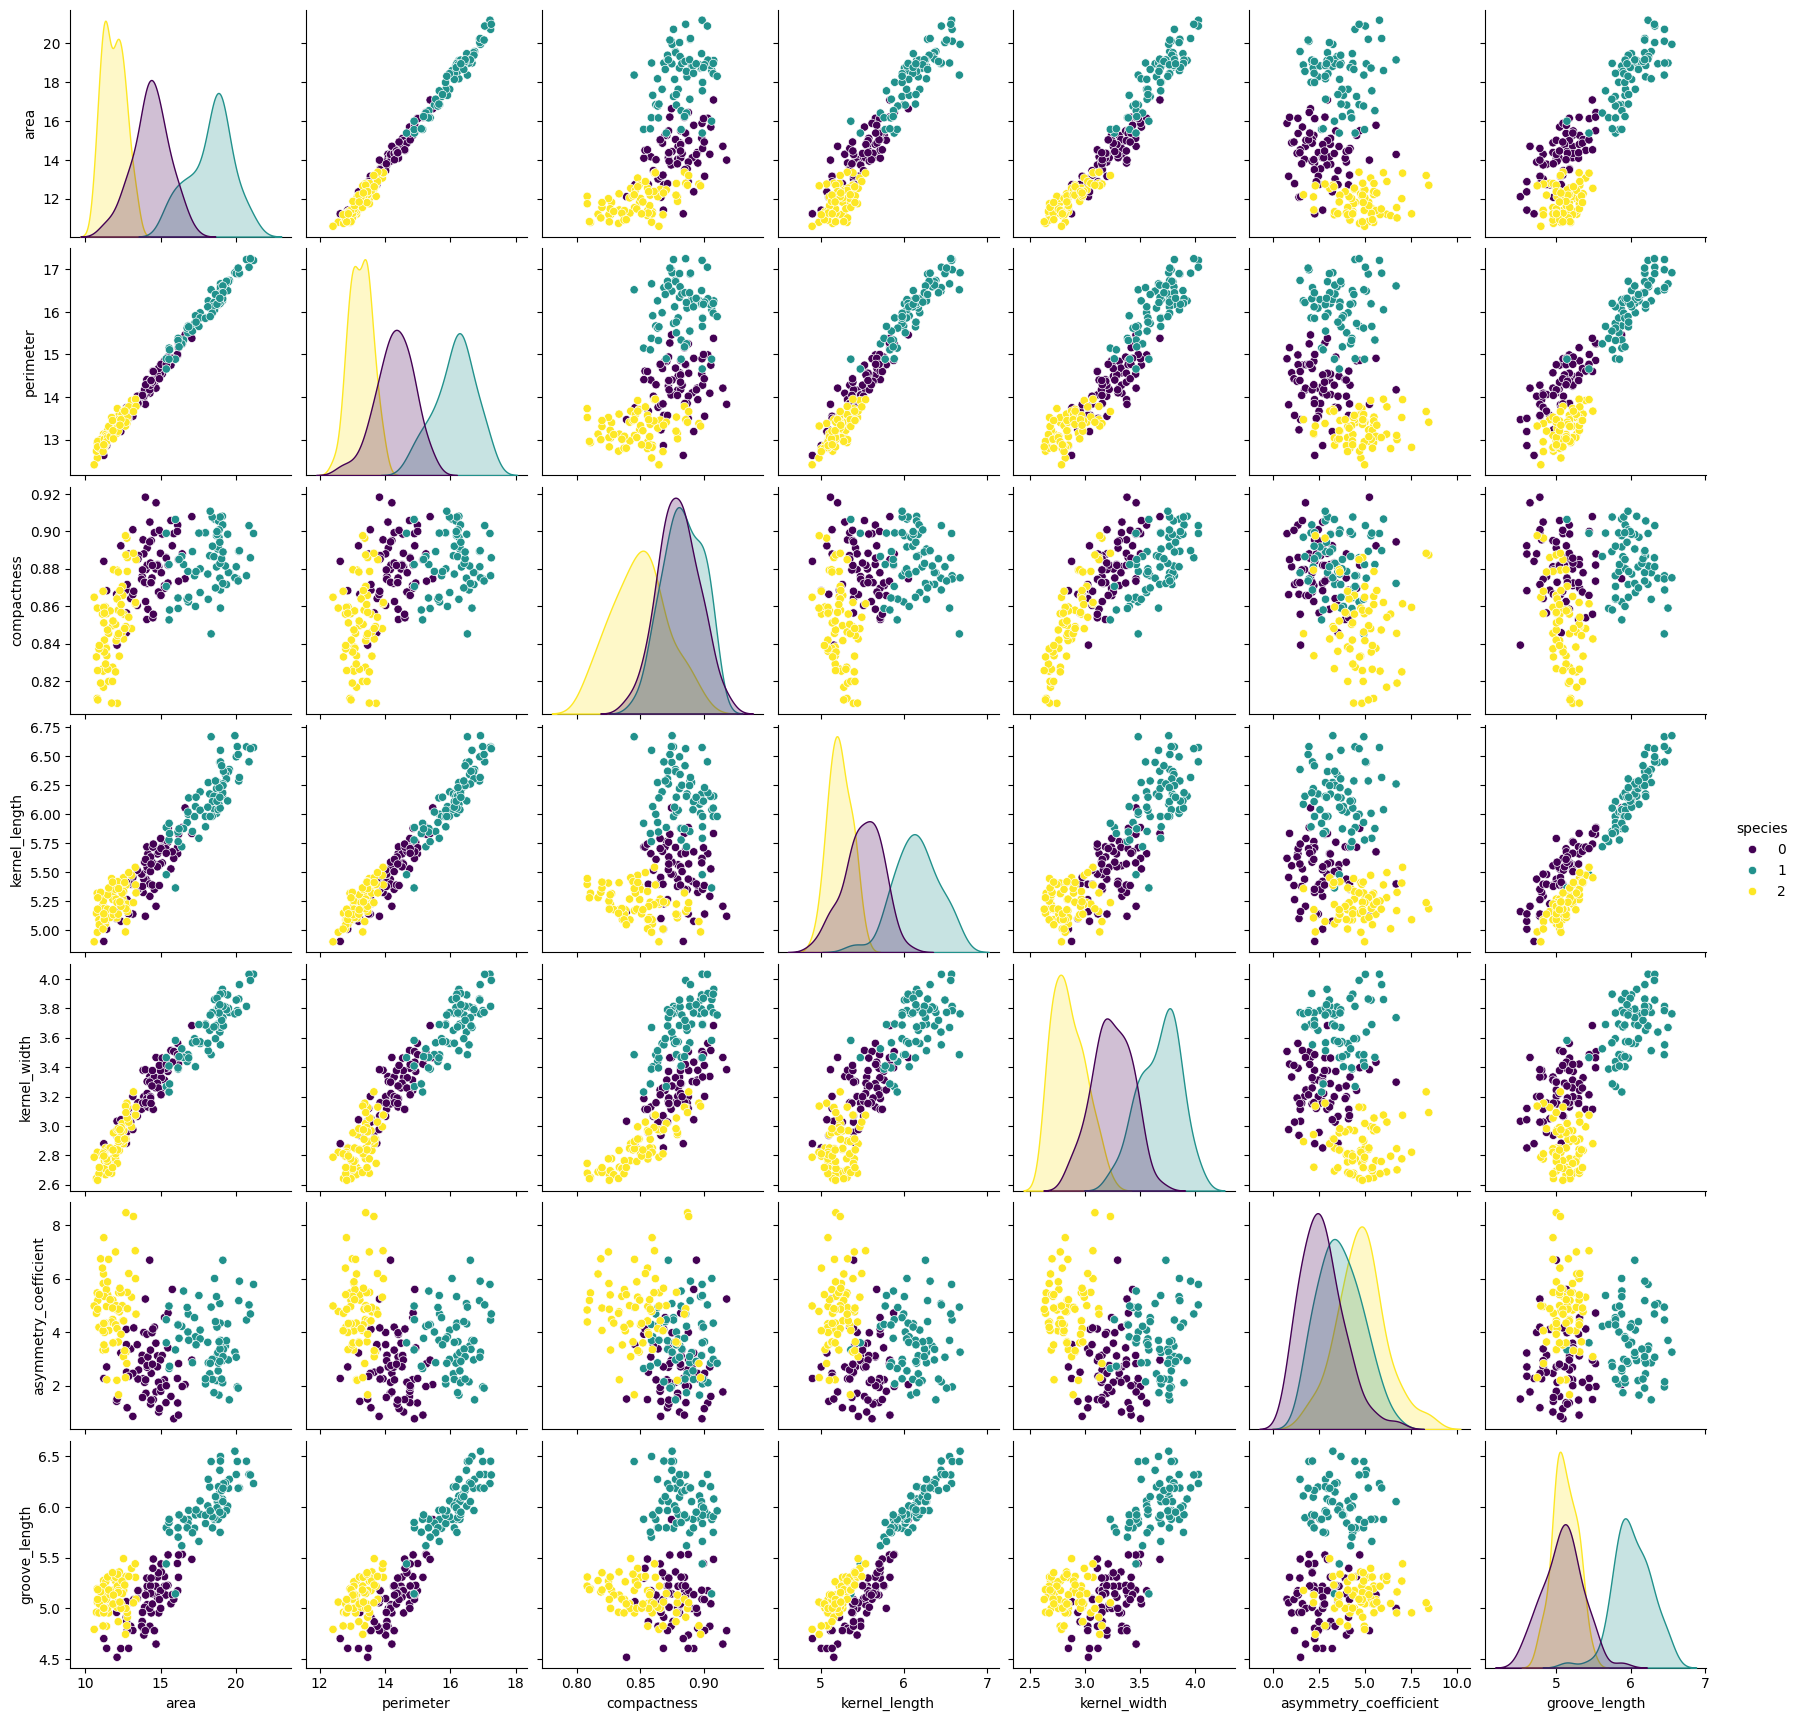

In [4]:
sns.pairplot(seed, hue='species', palette='viridis')
plt.show()

In [15]:
seed_cleaned =  seed.dropna()

In [16]:
features = ['compactness','groove_length']
X = seed_cleaned[features]

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow Method
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

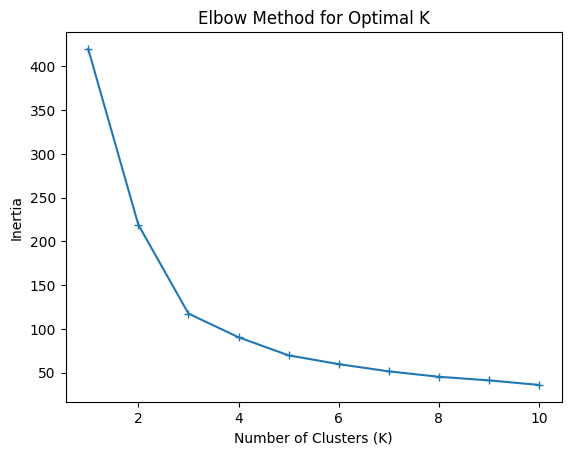

In [19]:
# Plot the Elbow Method
plt.plot(range(1, 11), inertia, marker='+')

plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

plt.title('Elbow Method for Optimal K')

plt.show()

In [20]:
# Choosing K=3 based on the Elbow Method
kmeans_final = KMeans(n_clusters=4, random_state=42)
seed_cleaned['cluster'] = kmeans_final.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


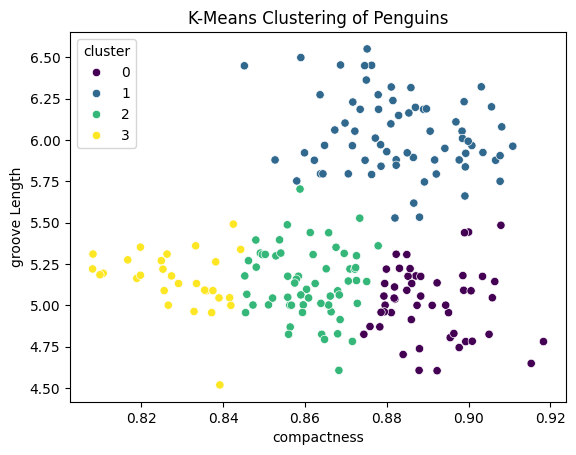

In [21]:
sns.scatterplot(x='compactness', y='groove_length', hue='cluster', data=seed_cleaned, palette='viridis')

plt.title('K-Means Clustering of Penguins')

plt.xlabel('compactness')
plt.ylabel('groove Length')

plt.show()

In [22]:
cluster_means =  seed_cleaned.groupby('cluster')[['compactness', 'groove_length']].mean()

print(cluster_means)

         compactness  groove_length
cluster                            
0           0.890700       5.017240
1           0.883239       6.029914
2           0.860954       5.135689
3           0.828614       5.153862


this provides insights into the average compactness and groove length of seeds in clusters

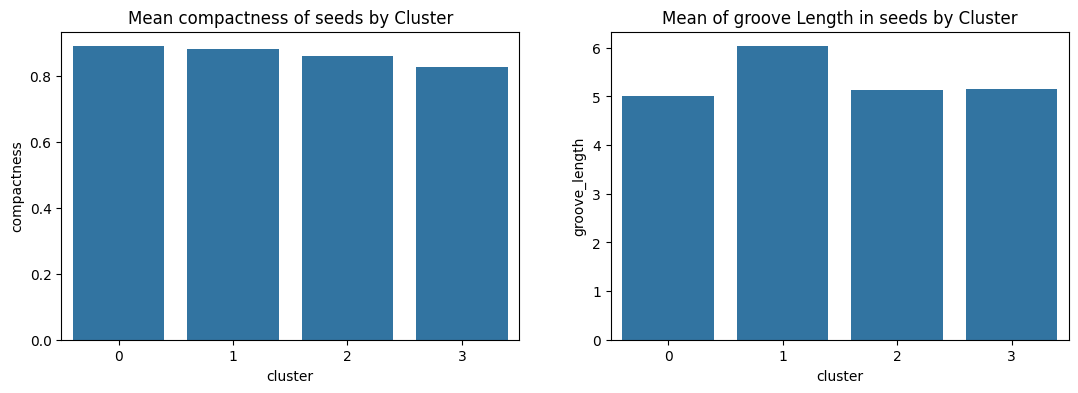

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(13, 4))

sns.barplot(x=cluster_means.index, y='compactness', data=cluster_means, ax=axes[0])
axes[0].set_title('Mean compactness of seeds by Cluster')

sns.barplot(x=cluster_means.index, y='groove_length', data=cluster_means, ax=axes[1])
axes[1].set_title('Mean of groove Length in seeds by Cluster')

plt.show()